# Linear Regression

Based on [Realpython](https://realpython.com/linear-regression-in-python/), [Scikit-learn](https://scikit-learn.org/stable/modules/linear_model.html), and [Datacamp](https://www.datacamp.com/community/tutorials/essentials-linear-regression-python)

In [1]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import numpy as np

## Example in 2D

In [2]:
#A small set in 2D
x = np.array([[5], [15], [25], [35], [45], [55]])
y = np.array([5, 20, 14, 32, 22, 38])

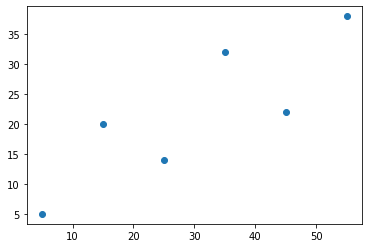

In [3]:
#Plotting it
plt.scatter(x, y)
plt.show()

In [4]:
#Generating a linear regression model, which is a line in this case
model = LinearRegression().fit(x, y)

In [5]:
#Slope of the line:
model.coef_

array([0.54])

In [6]:
#Intercept of the line:
model.intercept_

5.633333333333333

In [7]:
#Predicting a new (or an old) value:
model.predict([[20]])

array([16.43333333])

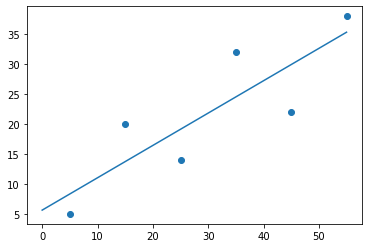

In [8]:
#Plotting the regresion line
xfit = np.linspace(0, 55, 1000) #1000 evenly spaced points in [0, 55].
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()

## Regularization

In [9]:
#Ridge regularization
ridge_model = linear_model.Ridge(alpha=0.5)
ridge_model.fit(x, y)
(ridge_model.coef_,ridge_model.intercept_)

(array([0.53984576]), 5.63796058269066)

In [10]:
#Lasso regularization
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(x, y)
(lasso_model.coef_,lasso_model.intercept_)

(array([0.53965714]), 5.643619047619044)

## Noisy set

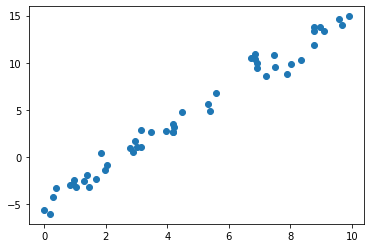

In [11]:
#Generating a noisy set
#A random generator with seed 1:
rng = np.random.RandomState(1)
#x-values
x = 10 * rng.rand(50) #an array with 50 random samples in the range [0,10) from the uniform distribution
#y-values
noise = rng.randn(50) #an array with 50 random samples from the normal distribution with mean 0 and variance 1.
y = 2 * x - 5 + noise #a line with added noise

plt.scatter(x, y)
plt.show()


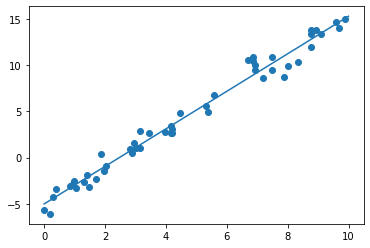

In [12]:
model = LinearRegression()
model.fit(x[:, np.newaxis], y)
xfit = np.linspace(0, 10, 1000) #1000 evenly spaced points in [0, 10].
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x, y)
plt.plot(xfit, yfit)
plt.show()


In [13]:
#We almost get the slope 2 back:
print(model.coef_)

[2.02720881]


In [14]:
#We almost get the intercept -5 back:
print(model.intercept_)

-4.9985770855532055


## Example in 3D

In [15]:
# A simple example with a data set in 3D:
x = np.array([[0, 0], [0, 0], [1, 1]])
y = np.array([0, 0.1, 1])

In [16]:
#Generating a linear regression model, which is a plane in this case
model = LinearRegression().fit(x, y)

In [17]:
#Now there are two coefficients:
model.coef_

array([0.475, 0.475])

In [18]:
#And one constant:
model.intercept_

0.050000000000000155

In [19]:
model.predict([[1, 1]])

array([1.])

In [20]:
#Ridge regularization
ridge_model = linear_model.Ridge(alpha=0.5)
ridge_model.fit(x, y)
(ridge_model.coef_,ridge_model.intercept_)

(array([0.34545455, 0.34545455]), 0.13636363636363638)

In [21]:
#Lasso regularization
lasso_model = linear_model.Lasso(alpha=0.1)
lasso_model.fit(x, y)
(lasso_model.coef_,lasso_model.intercept_)

(array([0.5, 0. ]), 0.20000000000000004)

We can also generate the data using random number generator.

In [22]:
# Generate 10 random values in the range [0,1)
rng = np.random.RandomState(1)  # set random seed to 1.
rng.rand(10)

array([4.17022005e-01, 7.20324493e-01, 1.14374817e-04, 3.02332573e-01,
       1.46755891e-01, 9.23385948e-02, 1.86260211e-01, 3.45560727e-01,
       3.96767474e-01, 5.38816734e-01])

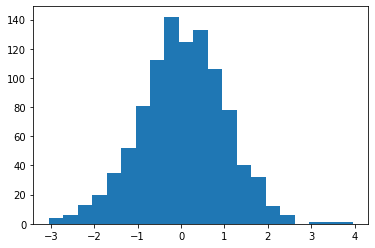

In [23]:
# Generate 1000 random numbers from the standard normal distribution with mean 0 and variance 1
rng = np.random.RandomState(1)  # set random seed to 1.
plt.hist(rng.randn(1000), bins=21)
plt.show()

x is  [4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00]
y is  [ 2.65326739  8.56128423 -5.66895863  1.03398685 -3.18219253 -2.91881241
  0.3850064   2.6532587   2.74351393  4.88870572  2.63673199 10.39684461
 -0.86014725 11.92535308 -4.26133265 10.50960534  3.466255    6.79099968
 -1.8

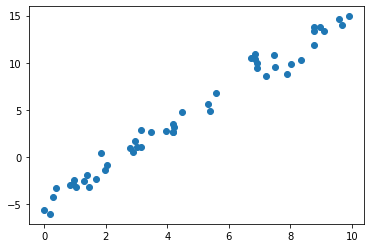

In [24]:
# Scatter data about a line with gradient 2 and intercept 5
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)

print("x is ", x)
print("y is ", y)

plt.scatter(x, y)
plt.show()

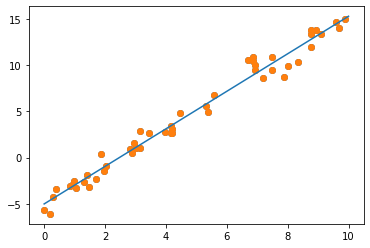

In [25]:
# Least squares linear regression

rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
plt.scatter(x, y)

from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(x[:, np.newaxis], y)

xfit = np.array([0, 10])
yfit = model.predict(xfit[:, np.newaxis])

plt.scatter(x,y)
plt.plot(xfit, yfit)
plt.show()

In [26]:
print(model.intercept_)

-4.9985770855532055


In [27]:
print(model.coef_)

[2.02720881]


In [28]:
import os
# gather the files that have names starting with 'd' in a specified directory into a list
filenames = []

for f_name in os.listdir('../../Module1/datasets'):
    if f_name.startswith('d'):
        filenames.append(f_name)
        
filenames

['d4.txt', 'd1.txt', 'd2.txt', 'd3.txt']

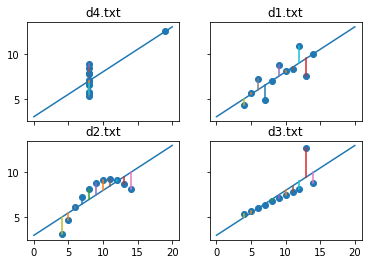

In [29]:
import pandas as pd

model = LinearRegression()

fig, axs = plt.subplots(2, 2, sharex = 'all', sharey = 'all')

for i in range(4):
    df = pd.read_csv(os.path.join('../../Module1/datasets',filenames[i]), sep=' ')
    xValues = np.array(df['x'])
    yValues = np.array(df['y'])
    model.fit(xValues[:, np.newaxis], yValues)
    xfit = np.array([0, 20])
    yfit = model.predict(xfit[:, np.newaxis])
    axs[ i // 2, i % 2 ].scatter(xValues, yValues)
    axs[ i // 2, i % 2 ].plot(xfit, yfit)
    axs[ i // 2, i % 2 ].set_title(filenames[i])
    
    yPredicted = model.predict(xValues[:, np.newaxis])
    for j in range(len(xValues)):
        lineXdata = (xValues[j], xValues[j])
        lineYdata = (yValues[j], yPredicted[j])
        axs[ i // 2, i % 2 ].plot(lineXdata, lineYdata)

# Hide x labels and tick labels for top plots
# and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

plt.show()